# Nueva sección

# **Ciencia de Datos**
**Actividad Semanal 4** 

Prof Jobish

**Equipo 65**

A00178679    Hector Manuel Gonzalez V

A00301492    Karel Alejandro Cuevas H

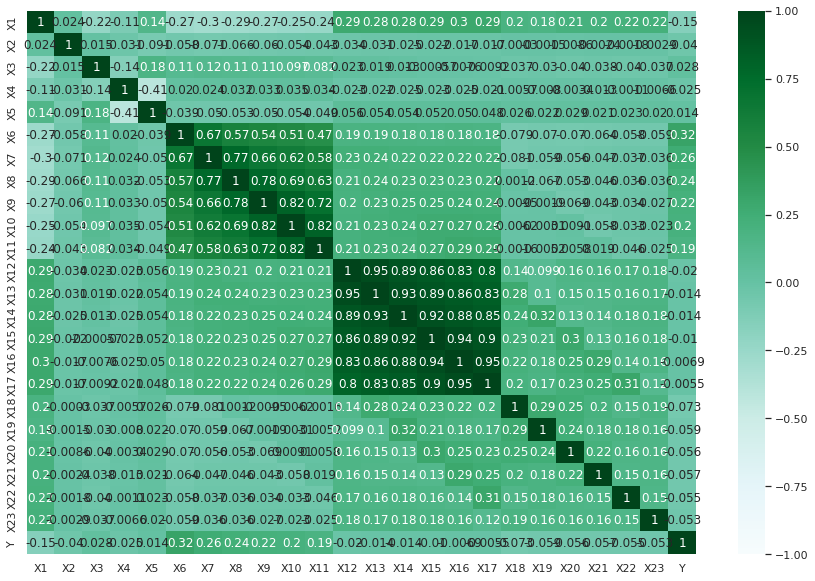

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./sample_data/actividadsemana4.csv', index_col=0)
df.index.name = None
df = df.dropna(axis=0)
#df.columns
# Quitamos las columnas que no son numericas o continuas
#coldrop = ['X2','X3','X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11','Y']
#df.drop(columns=coldrop, inplace=True)

df.corr()

corrs = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)
# Aqui vemos que el las correlaciones fuerets estan entre la X12 y X17

Determinamos que los valores pricipales son X12 a X17 por su fuerte correlación

In [5]:
ndf = df[['X12', 'X13', 'X14', 'X15', 'X16', 'X17','Y']]
# Cambiamos nombres para mejor entendimiento o claridad
ndf.columns=['Sept', 'Ago', 'Jul', 'Jun', 'May', 'Abr','Pago']
ndf = ndf.dropna(axis=0)
#ndf.columns revision de que el renombrado esta correcto
var=np.cov([ndf.Sept,ndf.Ago,ndf.Jul,ndf.Jun,ndf.May,ndf.Abr,ndf.Pago])
t=ndf.var().sum()
VarSept = var[0][0]
VarAgo = var[1][1]
VarJul = var[2][2]
VarJun = var[3][3]
VarMay = var[4][4]
VarAbr= var[5][5]
VarPago= var[6][6]

In [7]:
print('Varianza Total \t\t\t :', t.round(2))
print('Varianza de Septiembre \t\t :', ((VarSept/t)*100).round(2), '%')
print('Varianza de Agosto \t\t :', ((VarAgo/t)*100).round(2), '%')
print('Varianza de Julio \t\t :', ((VarJul/t)*100).round(2), '%')
print('Varianza de Junio \t\t :', ((VarJun/t)*100).round(2), '%')
print('Varianza de Mayo \t\t :', ((VarMay/t)*100).round(2), '%')
print('Varianza de Abril \t\t :', ((VarAbr/t)*100).round(2), '%')
print('Varianza de Pago \t\t :', ((VarPago/t)*100).round(2), '%')


Varianza Total 			 : 26706111442.52
Varianza de Septiembre 		 : 20.32 %
Varianza de Agosto 		 : 18.99 %
Varianza de Julio 		 : 18.03 %
Varianza de Junio 		 : 15.51 %
Varianza de Mayo 		 : 13.85 %
Varianza de Abril 		 : 13.29 %
Varianza de Pago 		 : 0.0 %


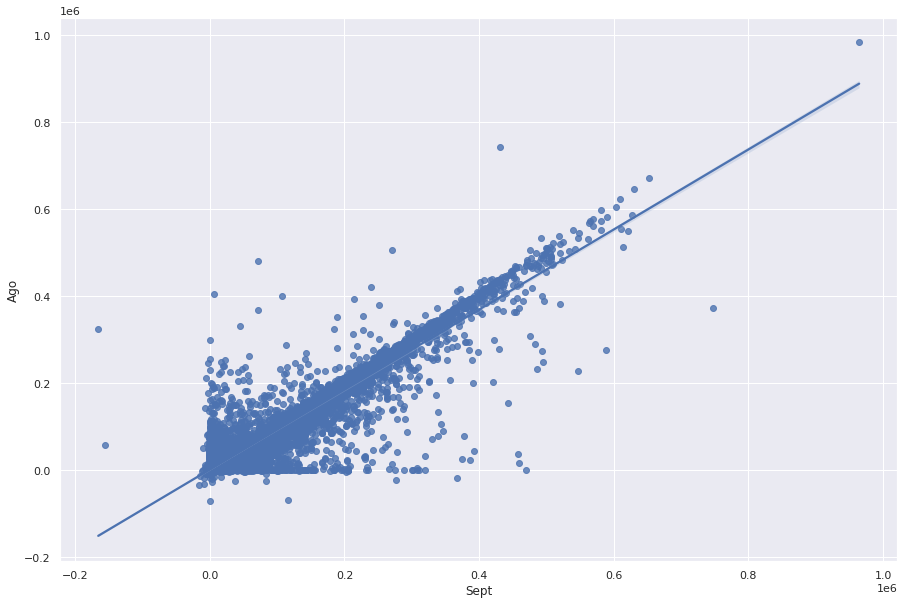

In [8]:
ndf.corr().round(2)
import seaborn as sns
p = sns.regplot(data=ndf,x =ndf.Sept, y= ndf.Ago)
p

Se ve una correlacion positiva Entre Sept y Agosto

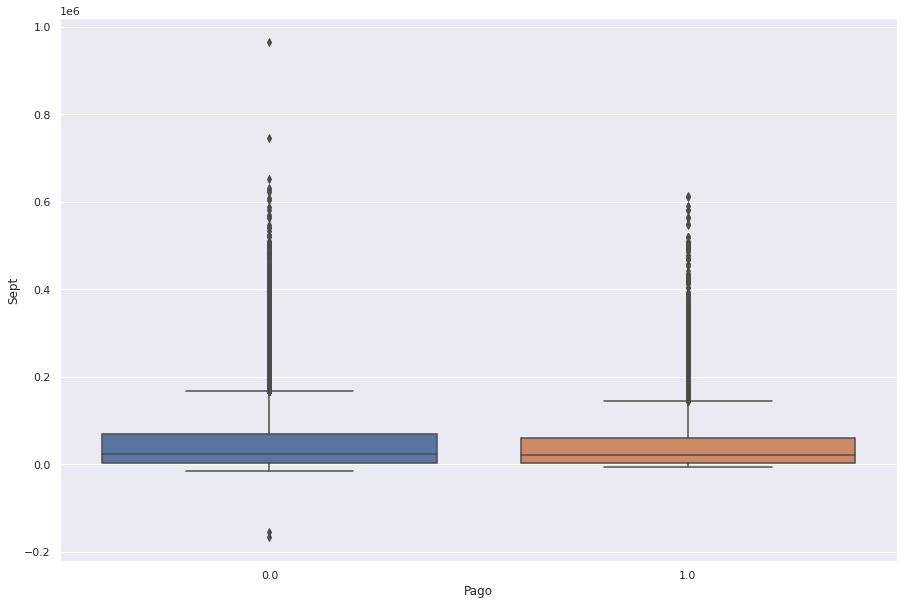

In [11]:
ndf.corr().round(2)
sns.boxplot(x="Pago", y="Sept", data=ndf)

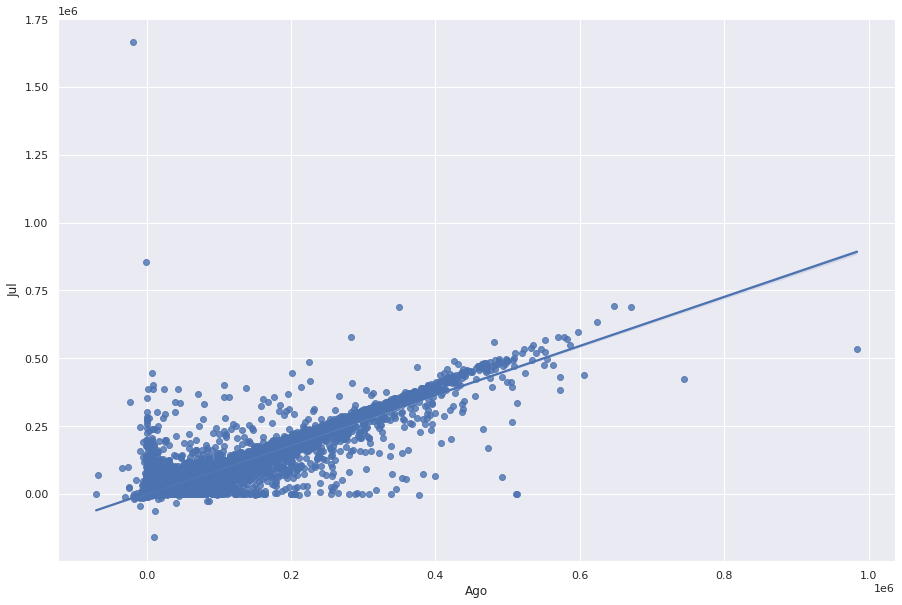

In [12]:
p = sns.regplot(data=ndf,x =ndf.Ago, y= ndf.Jul)
p

Una correlacion positica entre Agosto y Julio con algunos datos atípicos

In [17]:
import sklearn 
from sklearn.decomposition import PCA
from sklearn import preprocessing
pcs = PCA(n_components=7)
pcs.fit(ndf)
pcs.fit(preprocessing.scale((ndf)))
pcs.explained_variance_


array([5.43362777, 1.00004551, 0.30577133, 0.11166174, 0.06717788,
       0.04159658, 0.04035285])

In [18]:
pcs.explained_variance_ratio_

array([0.77620663, 0.14285888, 0.04368016, 0.01595114, 0.00959652,
       0.00594217, 0.0057645 ])

In [19]:
np.cumsum(pcs.explained_variance_ratio_)

array([0.77620663, 0.9190655 , 0.96274566, 0.97869681, 0.98829333,
       0.9942355 , 1.        ])

In [21]:
resumen = {'Desviación Estandar': np.sqrt(pcs.explained_variance_),
           'Proporcion de varianza':pcs.explained_variance_ratio_,
           'Proporcion acumulativa':np.cumsum(pcs.explained_variance_ratio_)}
pcsResumen = pd.DataFrame(resumen).transpose()
pcsResumen.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
pcsResumen = pcsResumen.round(2)
pcsResumen

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Desviación Estandar,2.33,1.00,0.55,0.33,0.26,0.20,0.20
Proporcion de varianza,0.78,0.14,0.04,0.02,0.01,0.01,0.01
Proporcion acumulativa,0.78,0.92,0.96,0.98,0.99,0.99,1.00


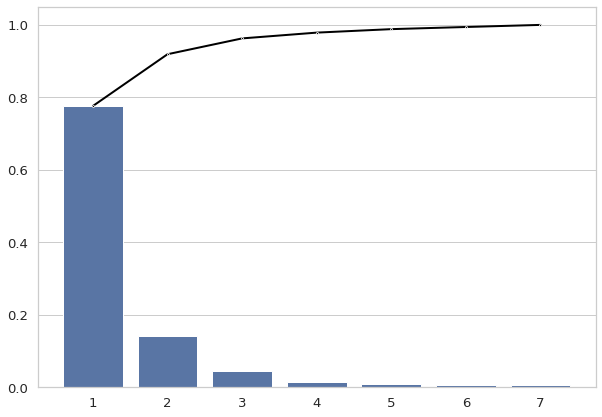

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
pc_components = np.arange(pcs.n_components_) +1
cusm = np.cumsum(pcs.explained_variance_ratio_)
vartio = pcs.explained_variance_ratio_
scree = sns.set(style='whitegrid', font_scale = 1.2)
fig, ax = plt.subplots(figsize=(10,7))
scree = sns.barplot(x=pc_components,y=vartio, color='b')
scree = sns.lineplot(x=pc_components-1, y=cusm, color='black', linestyle='-', linewidth= 2, marker='o', markersize= 2)

In [23]:
pcsComp = pd.DataFrame(pcs.components_.transpose(),columns=pcsResumen.columns,index=ndf.columns)
pcsComp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Sept,0.400882,-0.008333,0.536257,-0.457284,-0.224195,0.486567,0.235656
Ago,0.410548,-0.001794,0.429001,-0.116137,0.090280,-0.702603,-0.363477
Jul,0.412028,-0.000456,0.175560,0.622299,0.554486,0.175806,0.271648
Jun,0.414751,0.005330,-0.180746,0.439728,-0.591770,0.217222,-0.452268
May,0.410277,0.009799,-0.430010,-0.080330,-0.275453,-0.380161,0.647934
Abr,0.400736,0.011314,-0.528881,-0.436272,0.456141,0.216744,-0.337921
Pago,-0.006501,0.999837,0.016482,-0.000355,-0.000761,0.002990,0.001320


In [24]:
pcsComp.PC1.abs().nlargest(3)

Jun    0.414751
Jul    0.412028
Ago    0.410548
Name: PC1, dtype: float64

In [25]:
pcsComp.PC2.abs().nlargest(3)

Pago    0.999837
Abr     0.011314
May     0.009799
Name: PC2, dtype: float64

In [26]:
pcsComp.PC3.abs().nlargest(3)

Sept    0.536257
Abr     0.528881
May     0.430010
Name: PC3, dtype: float64

In [27]:
pcsComp.PC4.abs().nlargest(3)

Jul     0.622299
Sept    0.457284
Jun     0.439728
Name: PC4, dtype: float64

In [28]:
pcsComp.PC5.abs().nlargest(3)

Jun    0.591770
Jul    0.554486
Abr    0.456141
Name: PC5, dtype: float64

In [29]:
pcsComp.PC6.abs().nlargest(3)

Ago     0.702603
Sept    0.486567
May     0.380161
Name: PC6, dtype: float64

**¿Cuál es el número de componentes mínimo y por qué?**

  En base a los resultados creo que los componentes mínimos son 6, los valores de las ventas de Sept a Abril, estos tienen una muy fuerte correlacion entre los demás datos

**¿Cuál es la variación de los datos que representan esos componentes?**

  Tomando los resultados todos son muy parejos, pero sin usar PCA nos da que Sept Agosto y Julio cada uno representa un poco más del 20%

**¿Cuál es la pérdida de información después de realizar PCA?**

  Pues al usar el PCA vemos que Junio aparecere como más importante que julio, apareciendo más veces y con más peso entre los 6 PCs

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

  En la gráfica nos da que un solo componente tiene más del 80% de la varianza

  Ponderando ambos métodos, Septiembre Junio y Agosto son los más importantes, por el contrario Abril no aparece en el top 3 de importancia entre los demás componentes

Tuvimos la duda si se tuviera que escalar o no, en este caso escaladmos, pero la duda es por si estamos hablando de lo mismo que son ventas, pues creo que no deberíamos de haber escalado

**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

Cuando existena varios compontes que analizar, nos da la facilidad de encontrar cuántos componenetes principales nos dan más de un 80% de la varianza pudiendo así usar solo estos en los análisis cuando la información sea cuantiosa

